<a href="https://colab.research.google.com/github/Dtenisha/Dtenisha/blob/main/ML_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Data Loading

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly

In [2]:
data = pd.read_csv('/content/drive/MyDrive/ML_datasets/insurance_claims.csv')

In [3]:
data.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,2014-10-17,OH,250/500,1000,1406.91,0,466132,MALE,MD,craft-repair,sleeping,husband,53300,0,2015-01-25,Single Vehicle Collision,Side Collision,Major Damage,Police,SC,Columbus,9935 4th Drive,5,1,YES,1,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,MALE,MD,machine-op-inspct,reading,other-relative,0,0,2015-01-21,Vehicle Theft,?,Minor Damage,Police,VA,Riverwood,6608 MLK Hwy,8,1,?,0,0,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,2000-09-06,OH,100/300,2000,1413.14,5000000,430632,FEMALE,PhD,sales,board-games,own-child,35100,0,2015-02-22,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Columbus,7121 Francis Lane,7,3,NO,2,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,FEMALE,PhD,armed-forces,board-games,unmarried,48900,-62400,2015-01-10,Single Vehicle Collision,Front Collision,Major Damage,Police,OH,Arlington,6956 Maple Drive,5,1,?,1,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,2014-06-06,IL,500/1000,1000,1583.91,6000000,610706,MALE,Associate,sales,board-games,unmarried,66000,-46000,2015-02-17,Vehicle Theft,?,Minor Damage,None,NY,Arlington,3041 3rd Ave,20,1,NO,0,1,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN


In [4]:
data.tail()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
995,3,38,941851,1991-07-16,OH,500/1000,1000,1310.80,0,431289,FEMALE,Masters,craft-repair,paintball,unmarried,0,0,2015-02-22,Single Vehicle Collision,Front Collision,Minor Damage,Fire,NC,Northbrook,6045 Andromedia St,20,1,YES,0,1,?,87200,17440,8720,61040,Honda,Accord,2006,N,NaN
996,285,41,186934,2014-01-05,IL,100/300,1000,1436.79,0,608177,FEMALE,PhD,prof-specialty,sleeping,wife,70900,0,2015-01-24,Single Vehicle Collision,Rear Collision,Major Damage,Fire,SC,Northbend,3092 Texas Drive,23,1,YES,2,3,?,108480,18080,18080,72320,Volkswagen,Passat,2015,N,NaN
997,130,34,918516,2003-02-17,OH,250/500,500,1383.49,3000000,442797,FEMALE,Masters,armed-forces,bungie-jumping,other-relative,35100,0,2015-01-23,Multi-vehicle Collision,Side Collision,Minor Damage,Police,NC,Arlington,7629 5th St,4,3,?,2,3,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N,NaN
998,458,62,533940,2011-11-18,IL,500/1000,2000,1356.92,5000000,441714,MALE,Associate,handlers-cleaners,base-jumping,wife,0,0,2015-02-26,Single Vehicle Collision,Rear Collision,Major Damage,Other,NY,Arlington,6128 Elm Lane,2,1,?,0,1,YES,46980,5220,5220,36540,Audi,A5,1998,N,NaN
999,456,60,556080,1996-11-11,OH,250/500,1000,766.19,0,612260,FEMALE,Associate,sales,kayaking,husband,0,0,2015-02-26,Parked Car,?,Minor Damage,Police,WV,Columbus,1416 Cherokee Ridge,6,1,?,0,3,?,5060,460,920,3680,Mercedes,E400,2007,N,NaN


# Clean the data and replace '?' to nan value


In [5]:
data.replace(to_replace = '?',value = np.nan,inplace = True)

In [6]:
data.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported', '_c39'],
      dtype='object')

In [7]:
data.shape

(1000, 40)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

In [9]:
data.isna().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                  178
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

We see that the last column _c39 is completely null so we can drop the datset.

In [10]:
data.drop('_c39',axis='columns',inplace = True)

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 39 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

In [12]:
data.isna().sum()

months_as_customer               0
age                              0
policy_number                    0
policy_bind_date                 0
policy_state                     0
policy_csl                       0
policy_deductable                0
policy_annual_premium            0
umbrella_limit                   0
insured_zip                      0
insured_sex                      0
insured_education_level          0
insured_occupation               0
insured_hobbies                  0
insured_relationship             0
capital-gains                    0
capital-loss                     0
incident_date                    0
incident_type                    0
collision_type                 178
incident_severity                0
authorities_contacted            0
incident_state                   0
incident_city                    0
incident_location                0
incident_hour_of_the_day         0
number_of_vehicles_involved      0
property_damage                360
bodily_injuries     

In [13]:
data.describe()

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000
mean,203.954000,38.948000,546238.648000,1136.000000,1256.406150,1.101000e+06,501214.488000,25126.100000,-26793.700000,11.644000,1.83900,0.992000,1.487000,52761.94000,7433.420000,7399.570000,37928.950000,2005.103000
std,115.113174,9.140287,257063.005276,611.864673,244.167395,2.297407e+06,71701.610941,27872.187708,28104.096686,6.951373,1.01888,0.820127,1.111335,26401.53319,4880.951853,4824.726179,18886.252893,6.015861
min,0.000000,19.000000,100804.000000,500.000000,433.330000,-1.000000e+06,430104.000000,0.000000,-111100.000000,0.000000,1.00000,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000,1995.000000
25%,115.750000,32.000000,335980.250000,500.000000,1089.607500,0.000000e+00,448404.500000,0.000000,-51500.000000,6.000000,1.00000,0.000000,1.000000,41812.50000,4295.000000,4445.000000,30292.500000,2000.000000
50%,199.500000,38.000000,533135.000000,1000.000000,1257.200000,0.000000e+00,466445.500000,0.000000,-23250.000000,12.000000,1.00000,1.000000,1.000000,58055.00000,6775.000000,6750.000000,42100.000000,2005.000000
75%,276.250000,44.000000,759099.750000,2000.000000,1415.695000,0.000000e+00,603251.000000,51025.000000,0.000000,17.000000,3.00000,2.000000,2.000000,70592.50000,11305.000000,10885.000000,50822.500000,2010.000000
max,479.000000,64.000000,999435.000000,2000.000000,2047.590000,1.000000e+07,620962.000000,100500.000000,0.000000,23.000000,4.00000,2.000000,3.000000,114920.00000,21450.000000,23670.000000,79560.000000,2015.000000


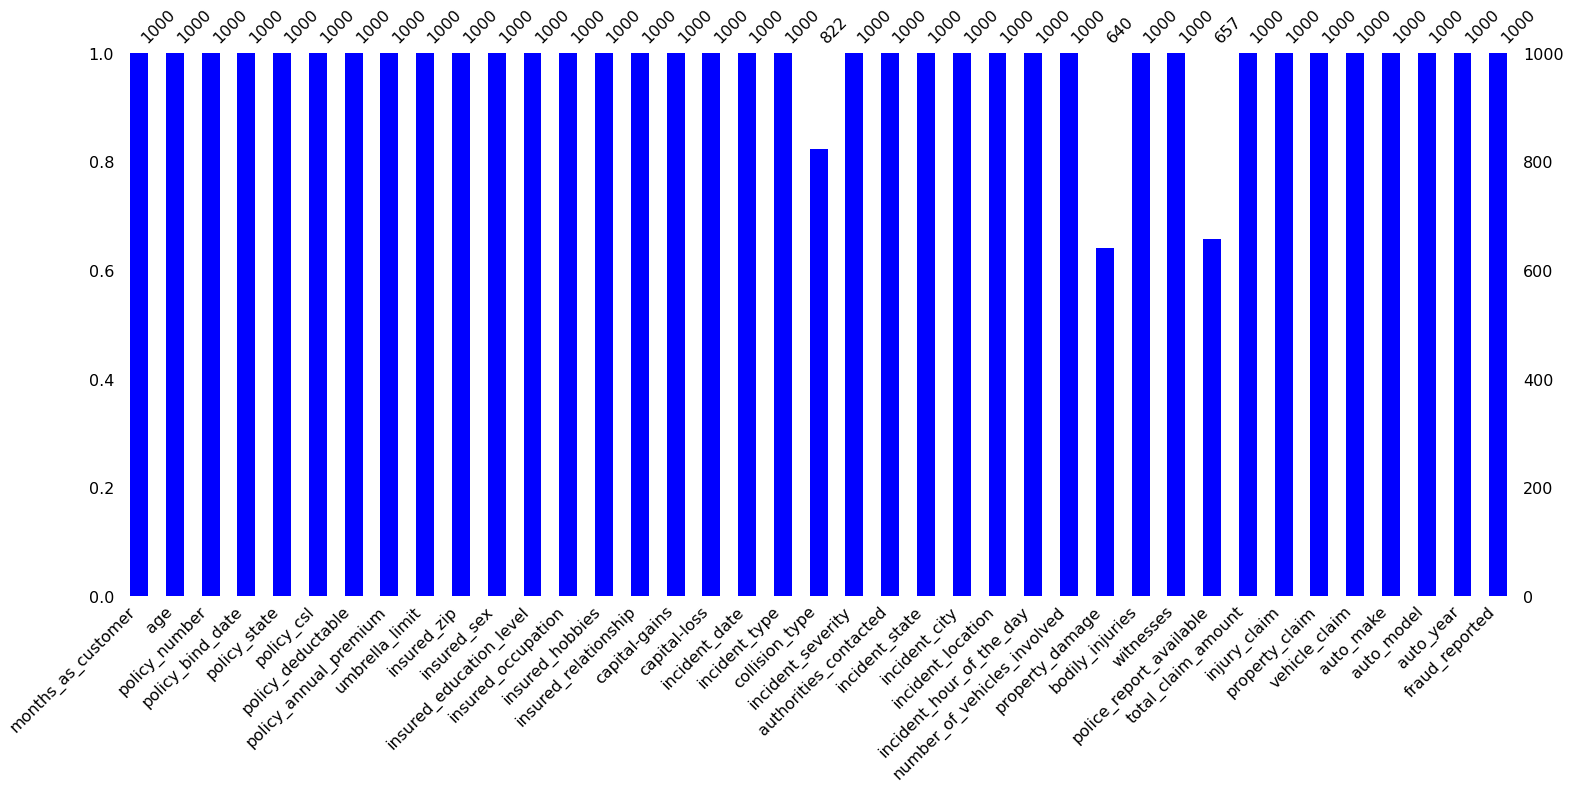

<Figure size 360x360 with 0 Axes>

In [14]:
import missingno as msno
msno.bar(data,color = 'blue')
plt.figure(figsize = (5,5))
plt.show()

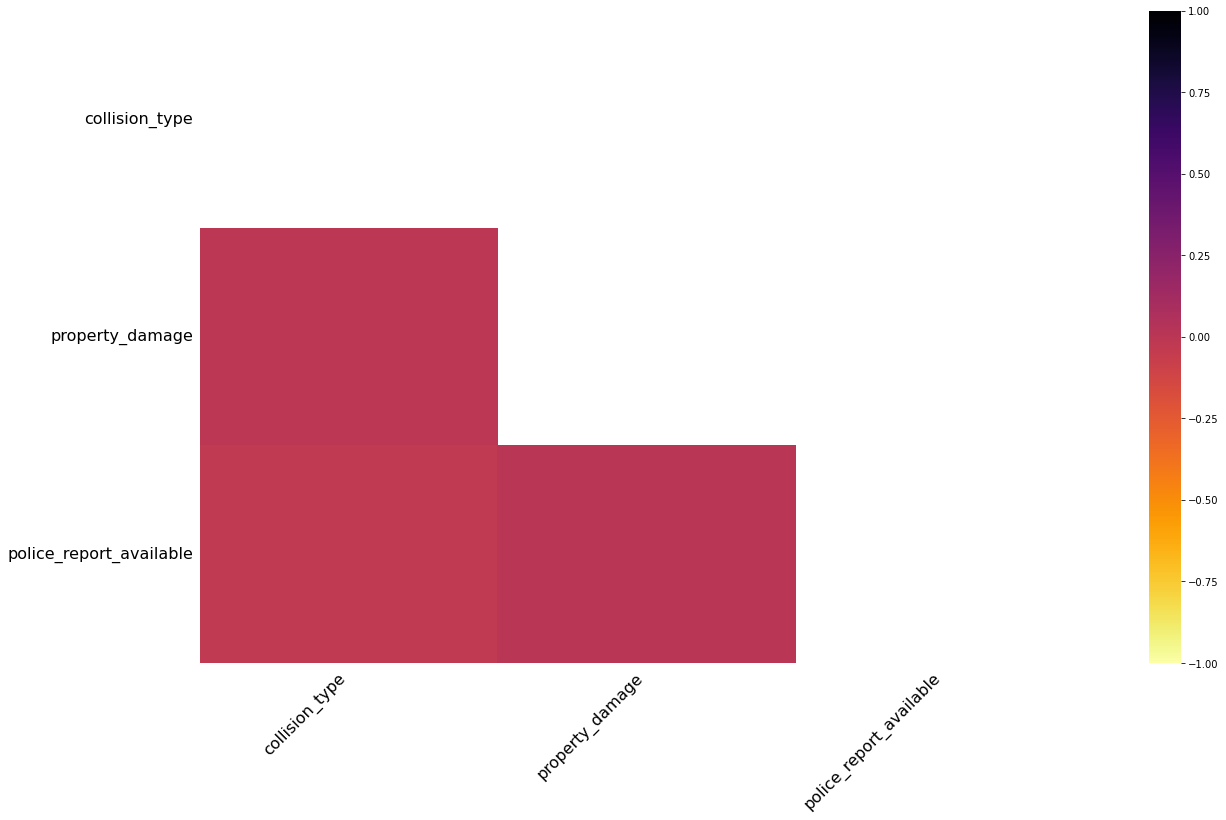

In [15]:
msno.heatmap(data,cmap='inferno_r')

<Figure size 1440x1080 with 0 Axes>

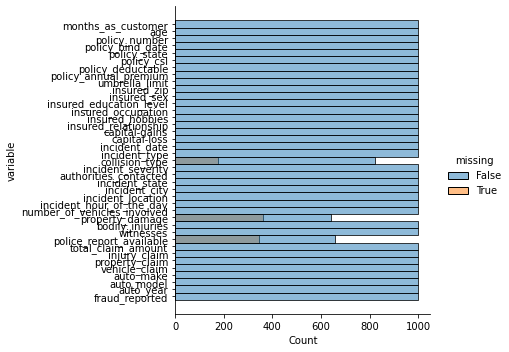

In [16]:
plt.figure(figsize=(20,15))
sns.displot(data = data.isna().melt(value_name = 'missing'),
                                    y = 'variable',hue = 'missing',aspect = 1.25)
plt.show()

#Missing Value Impution

##From the above plot we can witness the features containing Missing values are
1. collision Type - (categorical)
2. Property Damage - (categorical)
3. Police_report_available - (categorical)

In [17]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values= np.NaN, strategy= 'most_frequent')


In [18]:
data['collision_type'] = data['collision_type'].fillna(data['collision_type'].mode()[0])

In [19]:
data['property_damage'] = data['property_damage'].fillna(data['property_damage'].mode()[0])

In [20]:
data['police_report_available'] = data['police_report_available'].fillna(data['police_report_available'].mode()[0])

In [21]:
data.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,2014-10-17,OH,250/500,1000,1406.91,0,466132,MALE,MD,craft-repair,sleeping,husband,53300,0,2015-01-25,Single Vehicle Collision,Side Collision,Major Damage,Police,SC,Columbus,9935 4th Drive,5,1,YES,1,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y
1,228,42,342868,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,MALE,MD,machine-op-inspct,reading,other-relative,0,0,2015-01-21,Vehicle Theft,Rear Collision,Minor Damage,Police,VA,Riverwood,6608 MLK Hwy,8,1,NO,0,0,NO,5070,780,780,3510,Mercedes,E400,2007,Y
2,134,29,687698,2000-09-06,OH,100/300,2000,1413.14,5000000,430632,FEMALE,PhD,sales,board-games,own-child,35100,0,2015-02-22,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Columbus,7121 Francis Lane,7,3,NO,2,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N
3,256,41,227811,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,FEMALE,PhD,armed-forces,board-games,unmarried,48900,-62400,2015-01-10,Single Vehicle Collision,Front Collision,Major Damage,Police,OH,Arlington,6956 Maple Drive,5,1,NO,1,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y
4,228,44,367455,2014-06-06,IL,500/1000,1000,1583.91,6000000,610706,MALE,Associate,sales,board-games,unmarried,66000,-46000,2015-02-17,Vehicle Theft,Rear Collision,Minor Damage,None,NY,Arlington,3041 3rd Ave,20,1,NO,0,1,NO,6500,1300,650,4550,Accura,RSX,2009,N


In [22]:
data.isna().sum()

months_as_customer             0
age                            0
policy_number                  0
policy_bind_date               0
policy_state                   0
policy_csl                     0
policy_deductable              0
policy_annual_premium          0
umbrella_limit                 0
insured_zip                    0
insured_sex                    0
insured_education_level        0
insured_occupation             0
insured_hobbies                0
insured_relationship           0
capital-gains                  0
capital-loss                   0
incident_date                  0
incident_type                  0
collision_type                 0
incident_severity              0
authorities_contacted          0
incident_state                 0
incident_city                  0
incident_location              0
incident_hour_of_the_day       0
number_of_vehicles_involved    0
property_damage                0
bodily_injuries                0
witnesses                      0
police_rep

data.isna().sum()

# Visualization

In [23]:
import plotly.offline as py
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff


In [24]:
import warnings
warnings.filterwarnings("ignore")

In [25]:
from plotnine import *
from plotly.tools import mpl_to_plotly as ggplotly

In [26]:
p1 = ggplot(data, aes(x = 'age',y='policy_state'))+geom_point()
ggplotly(p1.draw())

In [27]:
cm = data.corr()

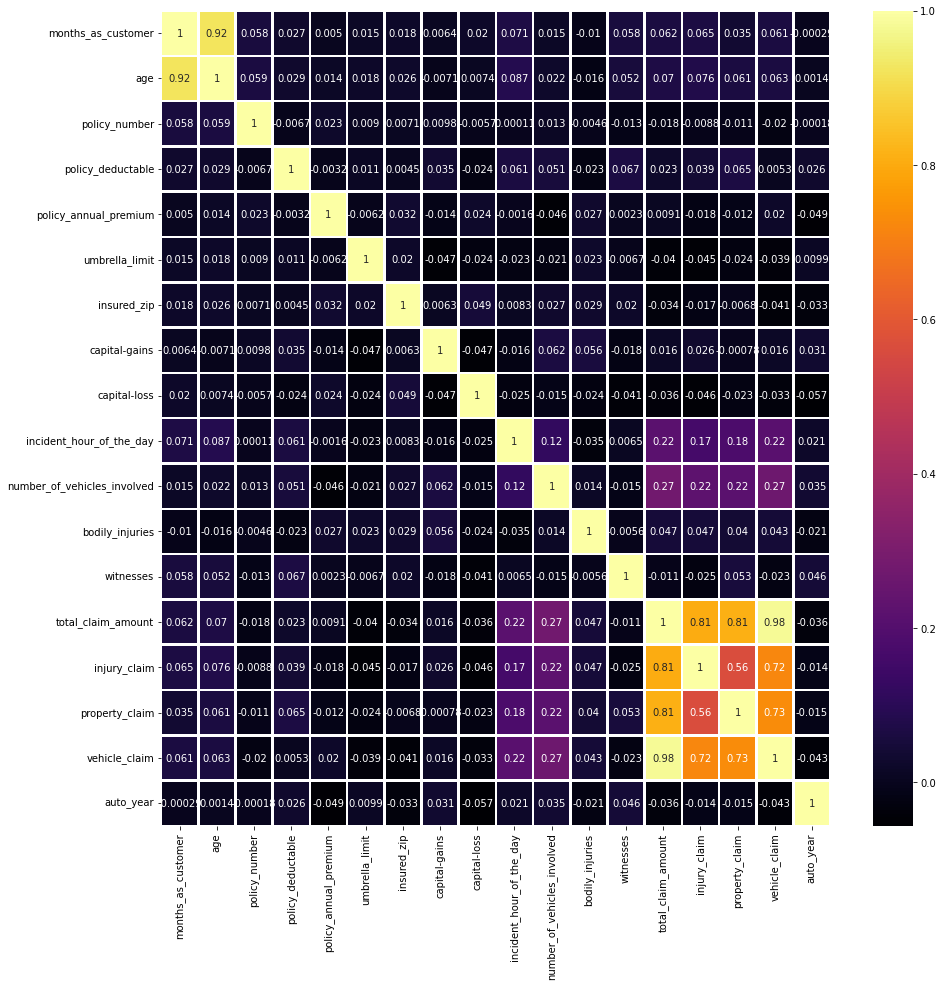

In [28]:
plt.figure(figsize=(15,15))
sns.heatmap(cm,annot = True,fmt = '.2g',linewidths=1.5,cmap='inferno')
plt.show()

In [29]:
#unique values
data.nunique()

months_as_customer              391
age                              46
policy_number                  1000
policy_bind_date                951
policy_state                      3
policy_csl                        3
policy_deductable                 3
policy_annual_premium           991
umbrella_limit                   11
insured_zip                     995
insured_sex                       2
insured_education_level           7
insured_occupation               14
insured_hobbies                  20
insured_relationship              6
capital-gains                   338
capital-loss                    354
incident_date                    60
incident_type                     4
collision_type                    3
incident_severity                 4
authorities_contacted             5
incident_state                    7
incident_city                     7
incident_location              1000
incident_hour_of_the_day         24
number_of_vehicles_involved       4
property_damage             

In [ ]:
data.columns

In [58]:
hist1 = px.histogram(data, x = 'age',color='insured_sex',nbins = 0,title ='Histogram - Age' )
hist1.update_layout(bargap = 0.2)
hist1.show()


In [59]:
hist2 = px.histogram(data, x = 'policy_annual_premium',color='insured_sex',nbins = 0,title ='Histogram - policy Annual Premium' )
hist2.update_layout(bargap = 0.2)
hist2.show()

In [60]:
hist3 = px.histogram(data, x = 'total_claim_amount',color='insured_sex',nbins = 0,title ='Total Claimed amount' )
hist3.update_layout(bargap = 0.2)
hist3.show()

In [61]:
hist4 = px.histogram(data, x = 'injury_claim',color='insured_sex',nbins = 0,title ='Histogram - Injury claim' )
hist4.update_layout(bargap = 0.2)
hist4.show()

In [62]:
hist5 = px.histogram(data, x = 'vehicle_claim',color='insured_sex',nbins = 0,title ='Histogram - Vehicle claim' )
hist5.update_layout(bargap = 0.2)
hist5.show()

In [63]:
hist6 = px.histogram(data, x = 'property_claim',color = 'insured_sex',title = 'Histogram - Property Claim')
hist6.update_layout(bargap = 0.2)
hist6.show()

In [64]:
hist7 = px.histogram(data, x = 'months_as_customer',color='insured_sex',nbins = 0,title ='Month Customers' )
hist7.update_layout(bargap = 0.2)

In [65]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

fig = make_subplots(rows=4, cols=2,subplot_titles=(
    "Histogram - Age", 
    "Histogram - Vehicle claim", 
    "Histogram - Property Claim", 
    "Histogram - Policy Annual Premium",
    "Histogram - Injury_claim",
    "Histogram - Total Claimed Amount",
    "Histogram - Months customer"))

fig.add_trace(
    go.Histogram(x=data['age']),
    row=1, col=1
)

fig.add_trace(
    go.Histogram(x=data['vehicle_claim']),
    row=1, col=2
)

fig.add_trace(
    go.Histogram(x=data['property_claim']),
    row=2, col=1
)

fig.add_trace(
    go.Histogram(x=data['policy_annual_premium']),
    row=2, col=2
)

fig.add_trace(
    go.Histogram(x=data['injury_claim']),
    row=3, col=1
)

fig.add_trace(
    go.Histogram(x=data['total_claim_amount']),
    row=3, col=2
)

fig.add_trace(
    go.Histogram(x=data['months_as_customer']),
    row=4,col = 1
)



#fig.update_layout(height=600, width=800, title_text="Side By Side Subplots")
fig
fig.update_layout(height = 1000, width =1000,bargap = 0.2, title_text = "Histogram Distributions")
fig.show()

In [66]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

fig = make_subplots(rows=6, cols=2,subplot_titles=(
    "BoxPlot - Age", 
    "BoxPlot - Vehicle claim", 
    "Boxplot - Property Claim", 
    "Boxplot - Policy Annual Premium",
    "Boxplot - Injury_claim",
    "Boxplot - Total Claimed Amount",
    "Boxplot - Months customer"))

fig.add_trace(
    go.Box(x=data['age']),
    row=1, col=1
)

fig.add_trace(
    go.Box(x=data['vehicle_claim']),
    row=1, col=2
)

fig.add_trace(
    go.Box(x=data['property_claim']),
    row=2, col=1
)

fig.add_trace(
    go.Box(x=data['policy_annual_premium']),
    row=2, col=2
)

fig.add_trace(
    go.Box(x=data['injury_claim']),
    row=3, col=1
)

fig.add_trace(
    go.Box(x=data['total_claim_amount']),
    row=3, col=2
)

fig.add_trace(
    go.Box(x=data['months_as_customer']),
    row=4,col = 1
)

fig.add_trace(
    go.Box(x = data['auto_make'],
          y = data['vehicle_claim'],),row = 4, col = 2
)

fig.add_trace(
    go.Box(x = data['incident_hour_of_the_day'],y = data['incident_city']),row = 5,col =1
)

fig.add_trace(
    go.Box(y = data['policy_bind_date'],x = data['policy_deductable']),row = 5,col = 2
)

fig.add_trace(
    go.Box(y = data['incident_date'],x = data['collision_type']),row = 6,col = 1
)
#fig.update_layout(height=600, width=800, title_text="Side By Side Subplots")

fig.update_layout(height = 1000, width =1000,bargap = 0.2, title_text = "Boxplots for independent variables")
fig.show()

In [67]:
categorical_data = data.select_dtypes(include=['object'])
categorical_data.head()

,policy_bind_date,policy_state,policy_csl,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,property_damage,police_report_available,auto_make,auto_model,fraud_reported
0,2014-10-17,OH,250/500,MALE,MD,craft-repair,sleeping,husband,2015-01-25,Single Vehicle Collision,Side Collision,Major Damage,Police,SC,Columbus,9935 4th Drive,YES,YES,Saab,92x,Y
1,2006-06-27,IN,250/500,MALE,MD,machine-op-inspct,reading,other-relative,2015-01-21,Vehicle Theft,Rear Collision,Minor Damage,Police,VA,Riverwood,6608 MLK Hwy,NO,NO,Mercedes,E400,Y
2,2000-09-06,OH,100/300,FEMALE,PhD,sales,board-games,own-child,2015-02-22,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Columbus,7121 Francis Lane,NO,NO,Dodge,RAM,N
3,1990-05-25,IL,250/500,FEMALE,PhD,armed-forces,board-games,unmarried,2015-01-10,Single Vehicle Collision,Front Collision,Major Damage,Police,OH,Arlington,6956 Maple Drive,NO,NO,Chevrolet,Tahoe,Y
4,2014-06-06,IL,500/1000,MALE,Associate,sales,board-games,unmarried,2015-02-17,Vehicle Theft,Rear Collision,Minor Damage,None,NY,Arlington,3041 3rd Ave,NO,NO,Accura,RSX,N


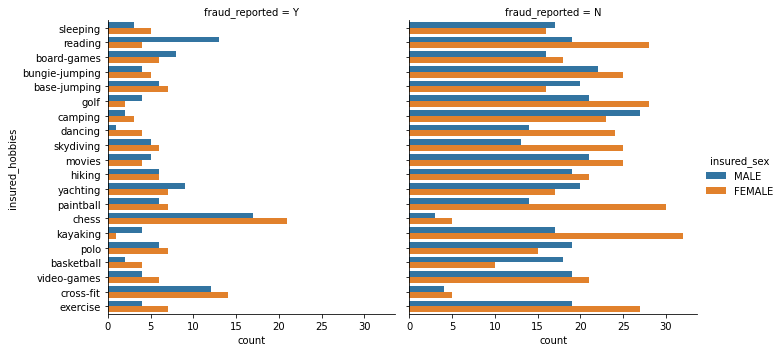

In [68]:
sns.catplot(data = data, y = 'insured_hobbies', hue = 'insured_sex',col = 'fraud_reported',kind = 'count')

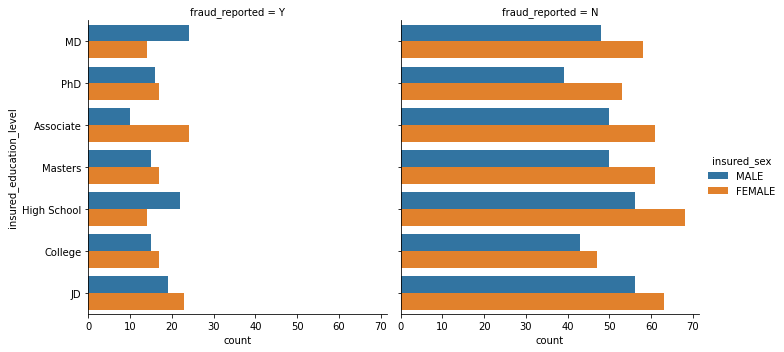

In [69]:
sns.catplot(y = 'insured_education_level',data=data,hue = 'insured_sex',col='fraud_reported',kind = 'count')

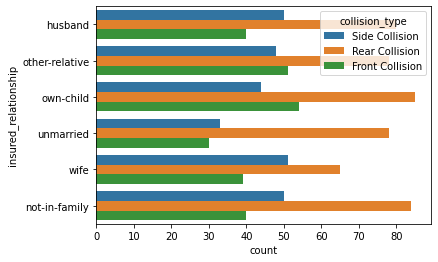

In [70]:
sns.countplot(data = data, y = 'insured_relationship',hue = 'collision_type')

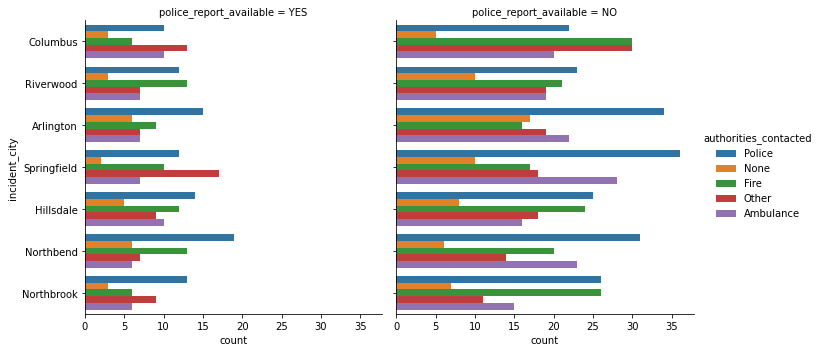

In [71]:
sns.catplot(data = data, y = 'incident_city',hue = 'authorities_contacted',col = 'police_report_available', kind = 'count')

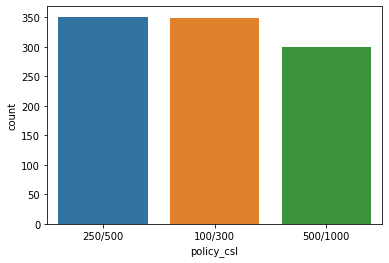

In [72]:
sns.countplot(data=data,x = 'policy_csl')

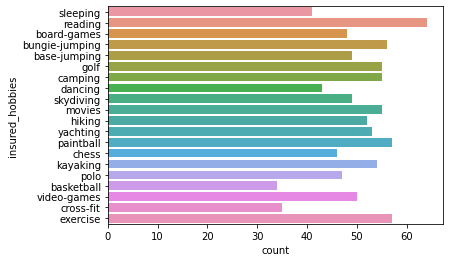

In [73]:
sns.countplot(data = data, y = 'insured_hobbies')

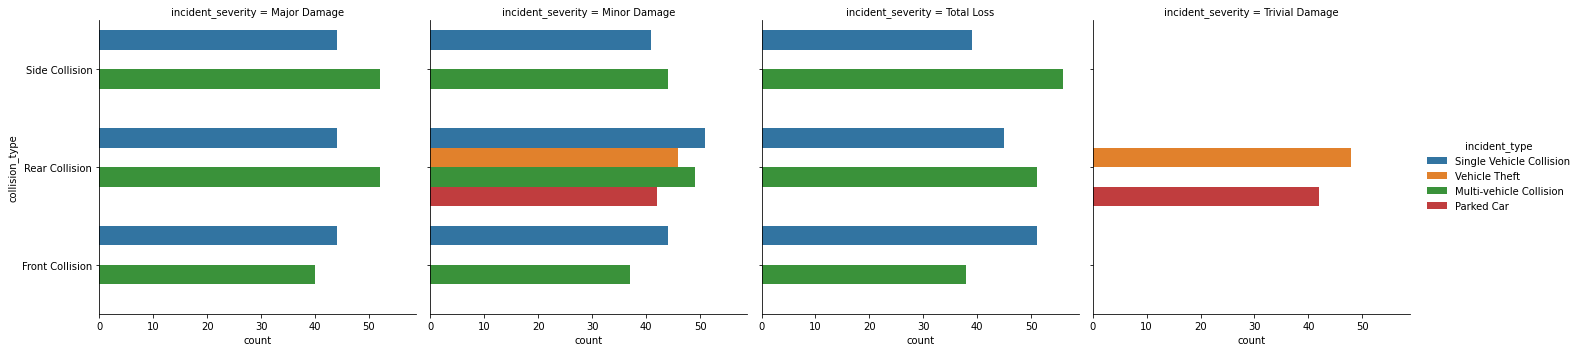

In [74]:
sns.catplot(data = data, y = 'collision_type',hue = 'incident_type',col = 'incident_severity', kind = 'count')

In [75]:
crosstab = pd.crosstab(data['incident_city'],data['incident_type'])

In [76]:
#import numpy as np
#from matplotlib.lines import Line2D
#import matplotlib.pyplot as plt
#import matplotlib.animation as animation
#import math#

In [77]:
# let's extrat days, month and year from policy bind date

data['policy_bind_date'] = pd.to_datetime(data['policy_bind_date'], errors = 'coerce')

In [78]:
#removing the unnecessary columns
# dropping columns which are not necessary for prediction

to_drop = ['policy_number','policy_bind_date','policy_state','insured_zip','incident_location','incident_date',
           'incident_state','incident_city','insured_hobbies','auto_make','auto_model','auto_year']

df = data.drop(to_drop, axis = 1)

In [79]:
df.head(3)

,months_as_customer,age,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,insured_relationship,capital-gains,capital-loss,incident_type,collision_type,incident_severity,authorities_contacted,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,fraud_reported
0,328,48,250/500,1000,1406.91,0,MALE,MD,craft-repair,husband,53300,0,Single Vehicle Collision,Side Collision,Major Damage,Police,5,1,YES,1,2,YES,71610,6510,13020,52080,Y
1,228,42,250/500,2000,1197.22,5000000,MALE,MD,machine-op-inspct,other-relative,0,0,Vehicle Theft,Rear Collision,Minor Damage,Police,8,1,NO,0,0,NO,5070,780,780,3510,Y
2,134,29,100/300,2000,1413.14,5000000,FEMALE,PhD,sales,own-child,35100,0,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,7,3,NO,2,3,NO,34650,7700,3850,23100,N


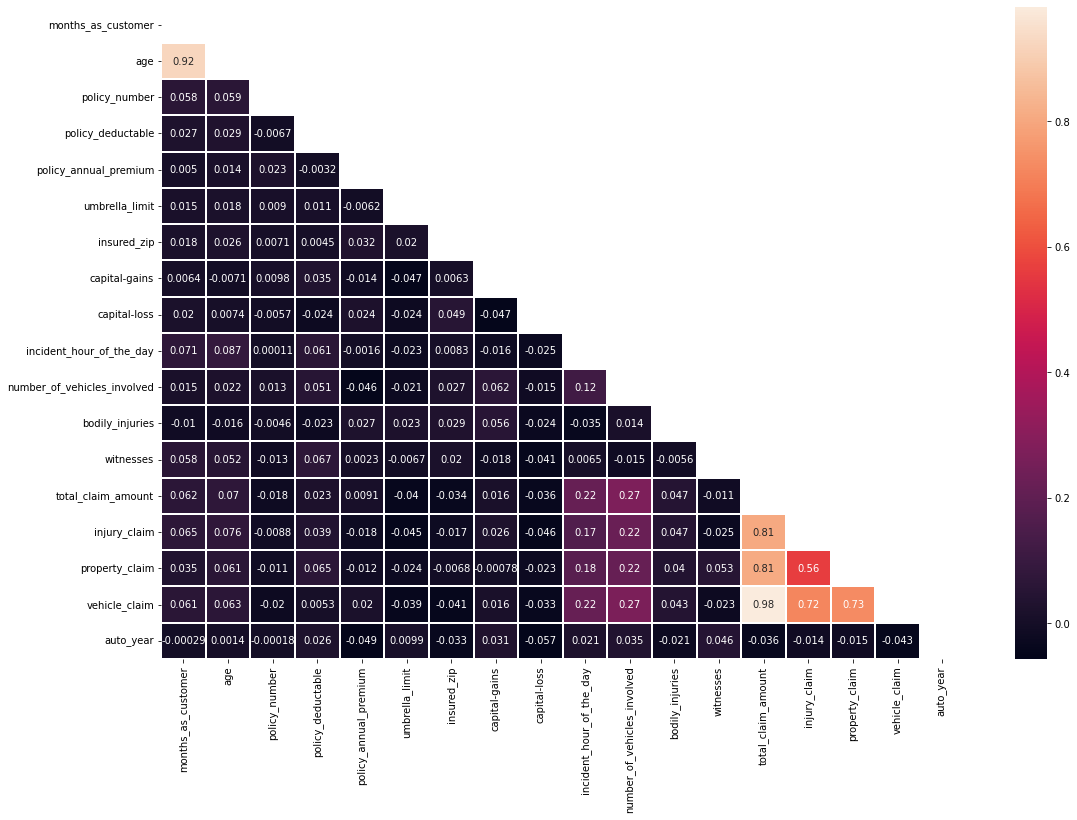

In [80]:
# checking for multicollinearity

plt.figure(figsize = (18, 12))

corr = data.corr()
mask = np.triu(np.ones_like(corr, dtype = bool))

sns.heatmap(data = corr, mask = mask, annot = True, fmt = '.2g', linewidth = 1)
plt.show()

In [81]:
# separating the feature and target columns

X = df.drop('fraud_reported', axis = 1)
y = df['fraud_reported']

In [82]:
# extracting categorical columns
cat_df = X.select_dtypes(include = ['object'])

In [83]:
cat_df.head(3)

,policy_csl,insured_sex,insured_education_level,insured_occupation,insured_relationship,incident_type,collision_type,incident_severity,authorities_contacted,property_damage,police_report_available
0,250/500,MALE,MD,craft-repair,husband,Single Vehicle Collision,Side Collision,Major Damage,Police,YES,YES
1,250/500,MALE,MD,machine-op-inspct,other-relative,Vehicle Theft,Rear Collision,Minor Damage,Police,NO,NO
2,100/300,FEMALE,PhD,sales,own-child,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NO,NO


In [84]:
# printing unique values of each column
for col in cat_df.columns:
    print(f"{col}: \n{cat_df[col].unique()}\n")

policy_csl: 
['250/500' '100/300' '500/1000']

insured_sex: 
['MALE' 'FEMALE']

insured_education_level: 
['MD' 'PhD' 'Associate' 'Masters' 'High School' 'College' 'JD']

insured_occupation: 
['craft-repair' 'machine-op-inspct' 'sales' 'armed-forces' 'tech-support'
 'prof-specialty' 'other-service' 'priv-house-serv' 'exec-managerial'
 'protective-serv' 'transport-moving' 'handlers-cleaners' 'adm-clerical'
 'farming-fishing']

insured_relationship: 
['husband' 'other-relative' 'own-child' 'unmarried' 'wife' 'not-in-family']

incident_type: 
['Single Vehicle Collision' 'Vehicle Theft' 'Multi-vehicle Collision'
 'Parked Car']

collision_type: 
['Side Collision' 'Rear Collision' 'Front Collision']

incident_severity: 
['Major Damage' 'Minor Damage' 'Total Loss' 'Trivial Damage']

authorities_contacted: 
['Police' 'None' 'Fire' 'Other' 'Ambulance']

property_damage: 
['YES' 'NO']

police_report_available: 
['YES' 'NO']



In [85]:
cat_df = pd.get_dummies(cat_df, drop_first = True)

In [86]:
cat_df.head(3)


,policy_csl_250/500,policy_csl_500/1000,insured_sex_MALE,insured_education_level_College,insured_education_level_High School,insured_education_level_JD,insured_education_level_MD,insured_education_level_Masters,insured_education_level_PhD,insured_occupation_armed-forces,insured_occupation_craft-repair,insured_occupation_exec-managerial,insured_occupation_farming-fishing,insured_occupation_handlers-cleaners,insured_occupation_machine-op-inspct,insured_occupation_other-service,insured_occupation_priv-house-serv,insured_occupation_prof-specialty,insured_occupation_protective-serv,insured_occupation_sales,insured_occupation_tech-support,insured_occupation_transport-moving,insured_relationship_not-in-family,insured_relationship_other-relative,insured_relationship_own-child,insured_relationship_unmarried,insured_relationship_wife,incident_type_Parked Car,incident_type_Single Vehicle Collision,incident_type_Vehicle Theft,collision_type_Rear Collision,collision_type_Side Collision,incident_severity_Minor Damage,incident_severity_Total Loss,incident_severity_Trivial Damage,authorities_contacted_Fire,authorities_contacted_None,authorities_contacted_Other,authorities_contacted_Police,property_damage_YES,police_report_available_YES
0,1,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,1,1
1,1,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,1,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0


In [87]:
# extracting the numerical columns

num_df = X.select_dtypes(include = ['int64'])

In [88]:
# combining the Numerical and Categorical dataframes to get the final dataset

X = pd.concat([num_df, cat_df], axis = 1)

In [89]:
X.head(3)

,months_as_customer,age,policy_deductable,umbrella_limit,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,policy_csl_250/500,policy_csl_500/1000,insured_sex_MALE,insured_education_level_College,insured_education_level_High School,insured_education_level_JD,insured_education_level_MD,insured_education_level_Masters,insured_education_level_PhD,insured_occupation_armed-forces,insured_occupation_craft-repair,insured_occupation_exec-managerial,insured_occupation_farming-fishing,insured_occupation_handlers-cleaners,insured_occupation_machine-op-inspct,insured_occupation_other-service,insured_occupation_priv-house-serv,insured_occupation_prof-specialty,insured_occupation_protective-serv,insured_occupation_sales,insured_occupation_tech-support,insured_occupation_transport-moving,insured_relationship_not-in-family,insured_relationship_other-relative,insured_relationship_own-child,insured_relationship_unmarried,insured_relationship_wife,incident_type_Parked Car,incident_type_Single Vehicle Collision,incident_type_Vehicle Theft,collision_type_Rear Collision,collision_type_Side Collision,incident_severity_Minor Damage,incident_severity_Total Loss,incident_severity_Trivial Damage,authorities_contacted_Fire,authorities_contacted_None,authorities_contacted_Other,authorities_contacted_Police,property_damage_YES,police_report_available_YES
0,328,48,1000,0,53300,0,5,1,1,2,71610,6510,13020,52080,1,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,1,1
1,228,42,2000,5000000,0,0,8,1,0,0,5070,780,780,3510,1,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,1,0,0,0,0,0,1,0,0
2,134,29,2000,5000000,35100,0,7,3,2,3,34650,7700,3850,23100,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0


From the Box plot it is clear that we do have some outliers.

In [90]:
# splitting data into training set and test set

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

In [91]:
X_train.head(3)

,months_as_customer,age,policy_deductable,umbrella_limit,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,policy_csl_250/500,policy_csl_500/1000,insured_sex_MALE,insured_education_level_College,insured_education_level_High School,insured_education_level_JD,insured_education_level_MD,insured_education_level_Masters,insured_education_level_PhD,insured_occupation_armed-forces,insured_occupation_craft-repair,insured_occupation_exec-managerial,insured_occupation_farming-fishing,insured_occupation_handlers-cleaners,insured_occupation_machine-op-inspct,insured_occupation_other-service,insured_occupation_priv-house-serv,insured_occupation_prof-specialty,insured_occupation_protective-serv,insured_occupation_sales,insured_occupation_tech-support,insured_occupation_transport-moving,insured_relationship_not-in-family,insured_relationship_other-relative,insured_relationship_own-child,insured_relationship_unmarried,insured_relationship_wife,incident_type_Parked Car,incident_type_Single Vehicle Collision,incident_type_Vehicle Theft,collision_type_Rear Collision,collision_type_Side Collision,incident_severity_Minor Damage,incident_severity_Total Loss,incident_severity_Trivial Damage,authorities_contacted_Fire,authorities_contacted_None,authorities_contacted_Other,authorities_contacted_Police,property_damage_YES,police_report_available_YES
545,131,29,1000,0,65700,0,5,1,1,3,76400,15280,7640,53480,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0
816,140,30,500,0,100500,0,4,4,0,0,60170,5470,10940,43760,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,0
644,254,40,500,5000000,0,-74400,23,1,2,2,53460,9720,4860,38880,1,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0


In [92]:
num_df = X_train[['months_as_customer', 'policy_deductable', 'umbrella_limit',
       'capital-gains', 'capital-loss', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'bodily_injuries', 'witnesses', 'injury_claim', 'property_claim',
       'vehicle_claim']]

In [93]:
# Scaling the numeric values in the dataset

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_data = scaler.fit_transform(num_df)

In [94]:
scaled_num_df = pd.DataFrame(data = scaled_data, columns = num_df.columns, index = X_train.index)
scaled_num_df.head(3)

,months_as_customer,policy_deductable,umbrella_limit,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,injury_claim,property_claim,vehicle_claim
545,-0.617146,-0.195993,-0.467919,1.465740,0.956142,-0.963117,-0.828615,-0.009798,1.351994,1.583037,0.052473,0.826042
816,-0.538944,-1.021808,-0.467919,2.720506,0.956142,-1.108048,2.098204,-1.234602,-1.325811,-0.406773,0.731072,0.314707
644,0.451613,-1.021808,1.773071,-0.903172,-1.684794,1.645646,-0.828615,1.215005,0.459392,0.455275,-0.519196,0.057988


In [95]:
X_train.drop(columns = scaled_num_df.columns, inplace = True)

In [96]:
X_train = pd.concat([scaled_num_df, X_train], axis = 1)

In [97]:
X_train.head(3)

,months_as_customer,policy_deductable,umbrella_limit,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,injury_claim,property_claim,vehicle_claim,age,total_claim_amount,policy_csl_250/500,policy_csl_500/1000,insured_sex_MALE,insured_education_level_College,insured_education_level_High School,insured_education_level_JD,insured_education_level_MD,insured_education_level_Masters,insured_education_level_PhD,insured_occupation_armed-forces,insured_occupation_craft-repair,insured_occupation_exec-managerial,insured_occupation_farming-fishing,insured_occupation_handlers-cleaners,insured_occupation_machine-op-inspct,insured_occupation_other-service,insured_occupation_priv-house-serv,insured_occupation_prof-specialty,insured_occupation_protective-serv,insured_occupation_sales,insured_occupation_tech-support,insured_occupation_transport-moving,insured_relationship_not-in-family,insured_relationship_other-relative,insured_relationship_own-child,insured_relationship_unmarried,insured_relationship_wife,incident_type_Parked Car,incident_type_Single Vehicle Collision,incident_type_Vehicle Theft,collision_type_Rear Collision,collision_type_Side Collision,incident_severity_Minor Damage,incident_severity_Total Loss,incident_severity_Trivial Damage,authorities_contacted_Fire,authorities_contacted_None,authorities_contacted_Other,authorities_contacted_Police,property_damage_YES,police_report_available_YES
545,-0.617146,-0.195993,-0.467919,1.465740,0.956142,-0.963117,-0.828615,-0.009798,1.351994,1.583037,0.052473,0.826042,29,76400,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0
816,-0.538944,-1.021808,-0.467919,2.720506,0.956142,-1.108048,2.098204,-1.234602,-1.325811,-0.406773,0.731072,0.314707,30,60170,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,0
644,0.451613,-1.021808,1.773071,-0.903172,-1.684794,1.645646,-0.828615,1.215005,0.459392,0.455275,-0.519196,0.057988,40,53460,1,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0


#Fitting the model

We can use, 
1. SVC or SVM - Support Vector Classifier or Support Vector Machine
2. Decision Tree Classification
3. KNN Classification
4. Random Forest Classifier




In [98]:
#Su
from sklearn.svm import SVC
svm = SVC()
svm.fit(X_train,y_train)

svm_y_predict = svm.predict(X_test)
#print(svm_y_predict)



Evaluation Metrics for SVM

Training accuracy of Support Vector Classifier is : 0.7493333333333333
Test accuracy of Support Vector Classifier is : 0.764
[[191   0]
 [ 59   0]]
              precision    recall  f1-score   support

           N       0.76      1.00      0.87       191
           Y       0.00      0.00      0.00        59

    accuracy                           0.76       250
   macro avg       0.38      0.50      0.43       250
weighted avg       0.58      0.76      0.66       250



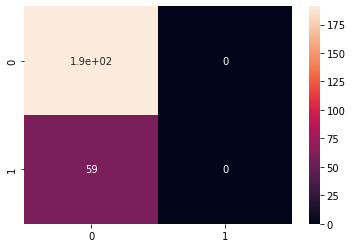

In [99]:
# accuracy_score, confusion_matrix and classification_report

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

svc_train_acc = accuracy_score(y_train, svm.predict(X_train))
svc_test_acc = accuracy_score(y_test, svm_y_predict)

print(f"Training accuracy of Support Vector Classifier is : {svc_train_acc}")
print(f"Test accuracy of Support Vector Classifier is : {svc_test_acc}")

cm = confusion_matrix(y_test, svm_y_predict)
print(cm)
print(classification_report(y_test, svm_y_predict))

sns.heatmap(cm, annot = True)

2. Decision Tree Classifier

In [100]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(criterion='gini',splitter = 'best')
dtc.fit(X_train,y_train)
dtc_pred=dtc.predict(X_test)
print(dtc_pred)

['N' 'Y' 'Y' 'Y' 'Y' 'Y' 'N' 'Y' 'Y' 'Y' 'Y' 'N' 'N' 'Y' 'Y' 'Y' 'Y' 'Y'
 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'Y' 'N' 'Y' 'Y' 'Y' 'Y' 'N' 'Y' 'Y' 'Y' 'N'
 'N' 'N' 'N' 'Y' 'Y' 'Y' 'Y' 'Y' 'N' 'N' 'N' 'Y' 'Y' 'Y' 'Y' 'Y' 'N' 'Y'
 'Y' 'N' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'N' 'Y' 'N' 'N'
 'N' 'Y' 'Y' 'Y' 'N' 'Y' 'Y' 'Y' 'Y' 'Y' 'N' 'N' 'N' 'Y' 'Y' 'Y' 'Y' 'Y'
 'Y' 'N' 'N' 'Y' 'Y' 'Y' 'N' 'N' 'Y' 'N' 'N' 'N' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y'
 'N' 'Y' 'N' 'N' 'Y' 'Y' 'Y' 'Y' 'Y' 'N' 'N' 'N' 'N' 'Y' 'Y' 'Y' 'Y' 'N'
 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'N' 'N' 'Y' 'Y' 'Y' 'Y' 'N' 'Y' 'N' 'Y' 'Y'
 'N' 'N' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'N' 'Y' 'Y' 'Y' 'N' 'Y' 'Y' 'Y'
 'Y' 'Y' 'Y' 'N' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'N' 'Y' 'Y' 'Y' 'Y' 'N' 'N'
 'Y' 'Y' 'Y' 'Y' 'Y' 'N' 'Y' 'Y' 'N' 'Y' 'Y' 'N' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y'
 'Y' 'N' 'Y' 'N' 'Y' 'N' 'Y' 'N' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'N' 'Y'
 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'N' 'Y' 'N' 'Y' 'Y'
 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y

Training accuracy of Decision Tree is : 1.0
Test accuracy of Decision Tree is : 0.424
[[ 57 134]
 [ 10  49]]
              precision    recall  f1-score   support

           N       0.85      0.30      0.44       191
           Y       0.27      0.83      0.40        59

    accuracy                           0.42       250
   macro avg       0.56      0.56      0.42       250
weighted avg       0.71      0.42      0.43       250



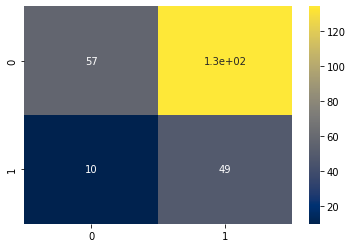

In [101]:
dtc_train_acc = accuracy_score(y_train, dtc.predict(X_train))
dtc_test_acc = accuracy_score(y_test, dtc_pred)

print(f"Training accuracy of Decision Tree is : {dtc_train_acc}")
print(f"Test accuracy of Decision Tree is : {dtc_test_acc}")

cm1 = confusion_matrix(y_test, dtc_pred)
print(cm1)
print(classification_report(y_test, dtc_pred))
sns.heatmap(cm1,annot = True, cmap = 'cividis')

We can see that the Decision Tree Algorithm is 'Overfitting'.
Now we can implement hyperparameter tuning 

In [102]:
# hyper parameter tuning

from sklearn.model_selection import GridSearchCV

grid_params = {
    'criterion' : ['gini', 'entropy'],
    'max_depth' : [3, 5, 7, 10],
    'min_samples_split' : range(2, 10, 1),
    'min_samples_leaf' : range(2, 10, 1)
}

grid_search = GridSearchCV(dtc, grid_params, cv = 5, n_jobs = -1, verbose = 1)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 512 candidates, totalling 2560 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 7, 10],
                         'min_samples_leaf': range(2, 10),
                         'min_samples_split': range(2, 10)},
             verbose=1)

In [103]:
# best parameters and best score

print(grid_search.best_params_)
print(grid_search.best_score_)

{'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 7, 'min_samples_split': 5}
0.8146666666666669


In [104]:
# best estimator 

dtc = grid_search.best_estimator_

y_pred = dtc.predict(X_test)

Training accuracy of Decision Tree is : 0.824
Test accuracy of Decision Tree is : 0.792

              precision    recall  f1-score   support

           N       0.88      0.84      0.86       191
           Y       0.55      0.64      0.59        59

    accuracy                           0.79       250
   macro avg       0.72      0.74      0.73       250
weighted avg       0.81      0.79      0.80       250



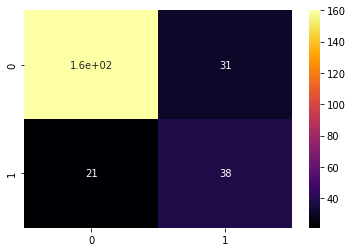

In [105]:
# accuracy_score, confusion_matrix and classification_report

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

dtc_train_acc = accuracy_score(y_train, dtc.predict(X_train))
dtc_test_acc = accuracy_score(y_test, y_pred)

print(f"Training accuracy of Decision Tree is : {dtc_train_acc}")
print(f"Test accuracy of Decision Tree is : {dtc_test_acc}")
cm2 = confusion_matrix(y_test, y_pred)
print()
print(classification_report(y_test, y_pred))
sns.heatmap(cm2,annot = True,cmap = 'inferno')

3. Random Forest Classifier

In [106]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(criterion= 'entropy', max_depth= 10, max_features= 'sqrt', min_samples_leaf= 1, min_samples_split= 3, n_estimators= 140)
rfc.fit(X_train, y_train)

rfc_pred = rfc.predict(X_test)
#print(rfc_pred)

Training accuracy of Random Forest is : 0.9626666666666667
Test accuracy of Random Forest is : 0.712
[[140  51]
 [ 21  38]]
              precision    recall  f1-score   support

           N       0.87      0.73      0.80       191
           Y       0.43      0.64      0.51        59

    accuracy                           0.71       250
   macro avg       0.65      0.69      0.65       250
weighted avg       0.77      0.71      0.73       250



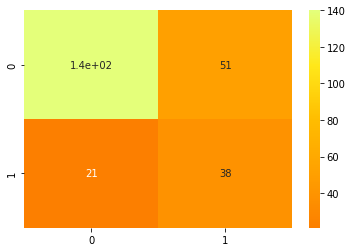

In [107]:
# accuracy_score, confusion_matrix and classification_report

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

rfc_train_acc = accuracy_score(y_train, rfc.predict(X_train))
rfc_test_acc = accuracy_score(y_test, rfc_pred)

print(f"Training accuracy of Random Forest is : {rfc_train_acc}")
print(f"Test accuracy of Random Forest is : {rfc_test_acc}")
cm3 = confusion_matrix(y_test, rfc_pred)
print(cm3)
print(classification_report(y_test, rfc_pred))
sns.heatmap(cm3,annot = True,cmap='Wistia_r')

4. KNN Classifier

In [108]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 30)
knn.fit(X_train, y_train)

knn_pred = knn.predict(X_test)
#print(knn_pred)

Training accuracy of KNN is : 0.7493333333333333
Test accuracy of KNN is : 0.792
[[160  31]
 [ 21  38]]
              precision    recall  f1-score   support

           N       0.88      0.84      0.86       191
           Y       0.55      0.64      0.59        59

    accuracy                           0.79       250
   macro avg       0.72      0.74      0.73       250
weighted avg       0.81      0.79      0.80       250



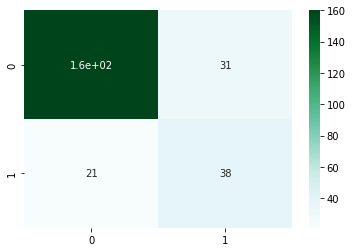

In [109]:
# accuracy_score, confusion_matrix and classification_report

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

knn_train_acc = accuracy_score(y_train, knn.predict(X_train))
knn_test_acc = accuracy_score(y_test, y_pred)

print(f"Training accuracy of KNN is : {knn_train_acc}")
print(f"Test accuracy of KNN is : {knn_test_acc}")
cm4 = confusion_matrix(y_test, y_pred)
print(cm4)
print(classification_report(y_test, y_pred))
sns.heatmap(cm4,annot = True,cmap = 'BuGn')

In [110]:
models = pd.DataFrame({
    'Model' : ['SVC', 'KNN', 'Decision Tree', 'Random Forest'],
    'Score' : [svc_test_acc, knn_test_acc, dtc_test_acc, rfc_test_acc]
})

In [111]:
models = pd.DataFrame({
    'Model' : ['SVC','Decision Tree Classification','Random Forest Classification','KNN'],
    'Score' : [svc_test_acc,  dtc_test_acc, knn_test_acc, rfc_test_acc]
})

models.sort_values(by = 'Score', ascending = False)

,Model,Score
1,Decision Tree Classification,0.792
2,Random Forest Classification,0.792
0,SVC,0.764
3,KNN,0.712


In [112]:
def configure_plotly_browser_state():
  import IPython
  display(IPython.core.display.HTML('''
        <script src="/static/components/requirejs/require.js"></script>
        <script>
          requirejs.config({
            paths: {
              base: '/static/base',
              plotly: 'https://cdn.plot.ly/plotly-latest.min.js?noext',
            },
          });
        </script>
        '''))

In [113]:


model_plot=px.bar(models,y = 'Score',x= 'Model',title='Models and Accuray')
model_plot.show(render = 'colab')

pip install

In [115]:
#pip install nbconvert

In [116]:
#!jupyter nbconvert --to html /content/ML_assignment.ipynb